# IMC Breast Cancer

In [1]:
import scanpy as sc
import spacec as sp
import warnings
warnings.filterwarnings("ignore")

2025-04-14 23:26:53.185962: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root: * TissUUmaps version: 3.1.1.6


In [2]:
data_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/Manuscript/NatComm_091624/revision_031225/analysis/app_spatial_proteomics/'
output_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/Manuscript/NatComm_091624/revision_031225/analysis/app_spatial_proteomics/output/'

In [3]:
# trying to read the imc
adata = sc.read(data_dir + 'imc_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

In [4]:
adata.obs['x'] = [sublist[0] for sublist in adata.obsm['spatial']]
adata.obs['y'] = [sublist[1] for sublist in adata.obsm['spatial']]
adata.obs['condition'] = "imc"

## Scatter plot

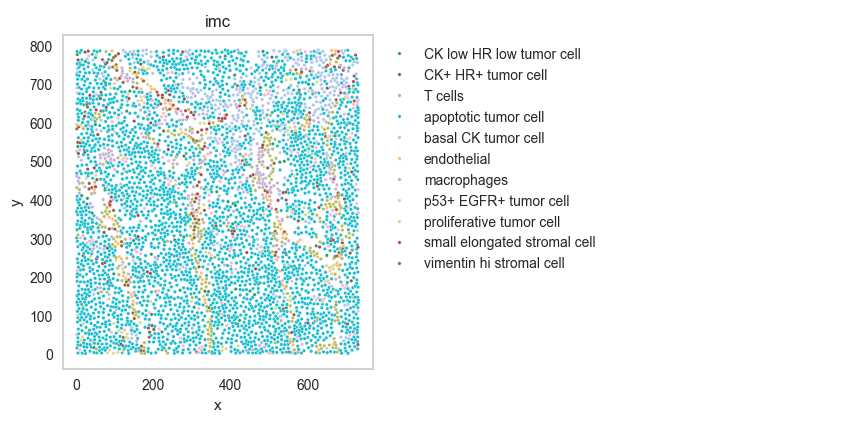

In [ ]:
df = sp.pl.catplot(
    adata, 
    color = "cell type", # specify group column name here (e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir= output_dir, # specify output directory here (if savefig=True)
)

## Cell type composition

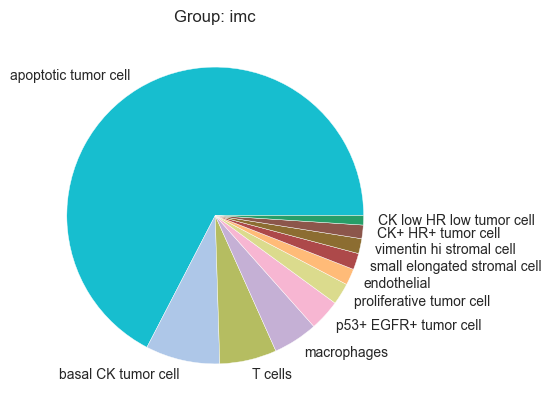

In [9]:
sp.pl.create_pie_charts(
    adata,
    color = "cell type", 
    grouping = "condition", 
    show_percentages=False,
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # change it to true if you want to save the figure
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir = output_dir #output directory for the figure
)

## Neighborhood analysis

In [37]:
adata = sp.tl.clustering(
    adata, 
    clustering='leiden', # can choose between leiden and louvian
    n_neighbors=10, # number of neighbors for the knn graph
    resolution = 1, #clustering resolution (higher resolution gives more clusters)
    reclustering = False, # if true, no computing the neighbors
    marker_list = None, #if it is None, all variable names are used for clustering
    seed=0, # random seed for clustering - reproducibility
)

Computing neighbors and UMAP
- neighbors


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


- UMAP
Clustering
Leiden clustering


... storing 'condition' as categorical


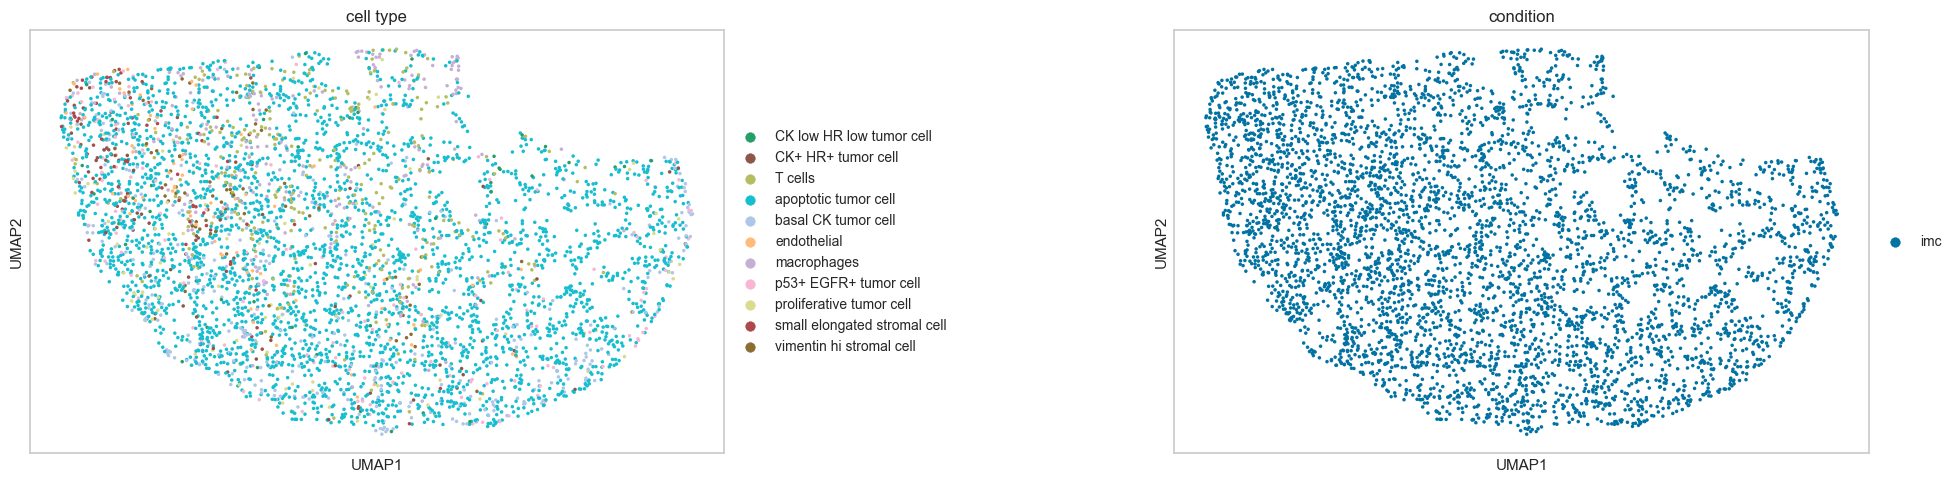

In [38]:
sc.pl.umap(adata, color = ['cell type', 'condition'], wspace=0.5) 

In [11]:
adata = sp.tl.neighborhood_analysis(
    adata, 
    unique_region = "condition", 
    cluster_col = "cell type", 
    X = 'x', Y = 'y',
    k = 20, # k nearest neighbors
    n_neighborhoods = 6, #number of CNs
    elbow = False)

Starting: 1/1 : imc
Finishing: 1/1 : imc 0.03435206413269043 0.034361839294433594


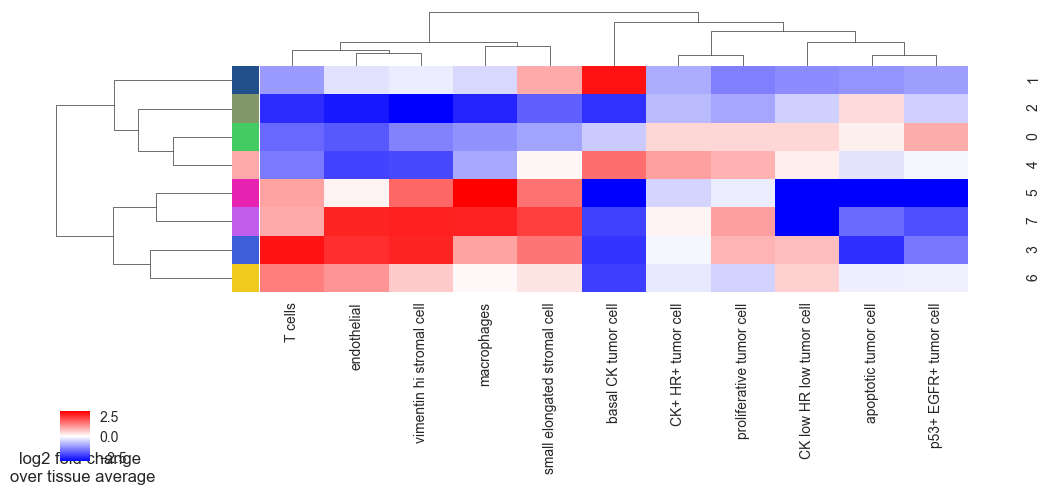

In [45]:
sp.pl.cn_exp_heatmap(
    adata, # anndata
    cluster_col = "cell type", # cell type column
    cn_col = "CN_k20_n6", # CN column
    palette=None, # color palette for CN
    savefig = False, # save the figure
    output_dir = output_dir, # output directory
    rand_seed = 1 # random seed for reproducibility
)

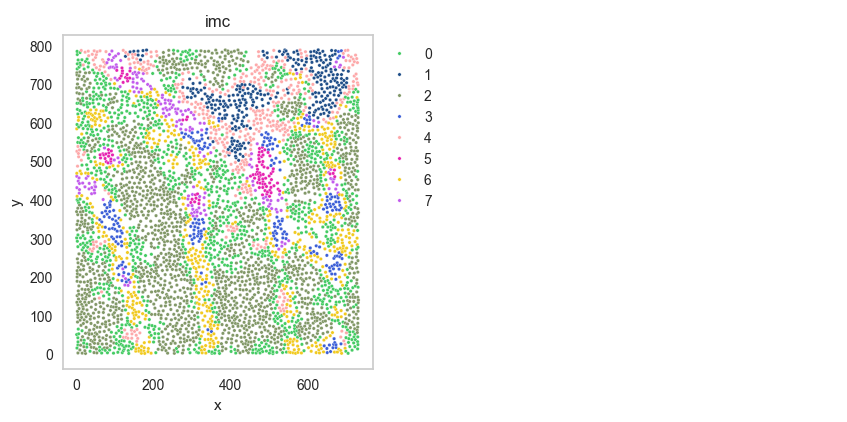

In [46]:
df = catplot(
    adata, 
    color = "CN_k20_n6", # specify group column name here (e.g. celltype_fine)
    unique_region = "condition", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir= output_dir, # specify output directory here (if savefig=True)
)

## Spatial context map

Starting: 1/1 : imc
Finishing: 1/1 : imc 0.055667877197265625 0.055673837661743164
12 0.014138817480719768


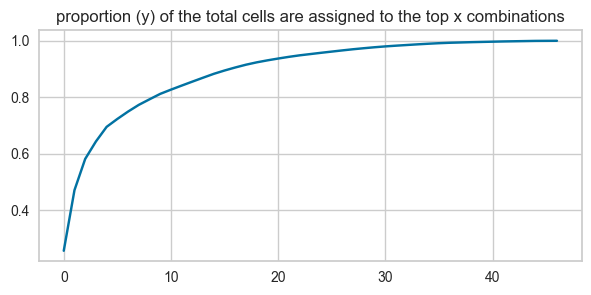

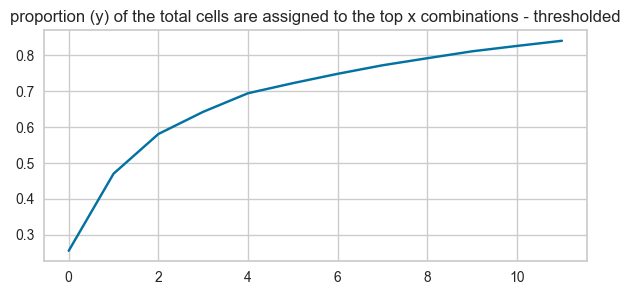

In [12]:
cnmap_dict_imc = sp.tl.build_cn_map(
    adata = adata, # adata object
    cn_col = "CN_k20_n6",# column with CNs
    palette = None, # color dictionary
    unique_region = 'condition',# column with unique regions
    k = 70, # number of neighbors
    X='x', Y='y',  # coordinates
    threshold = 0.85, # threshold for percentage of cells in CN
    per_keep_thres = 0.85,) # threshold for percentage of cells in CN

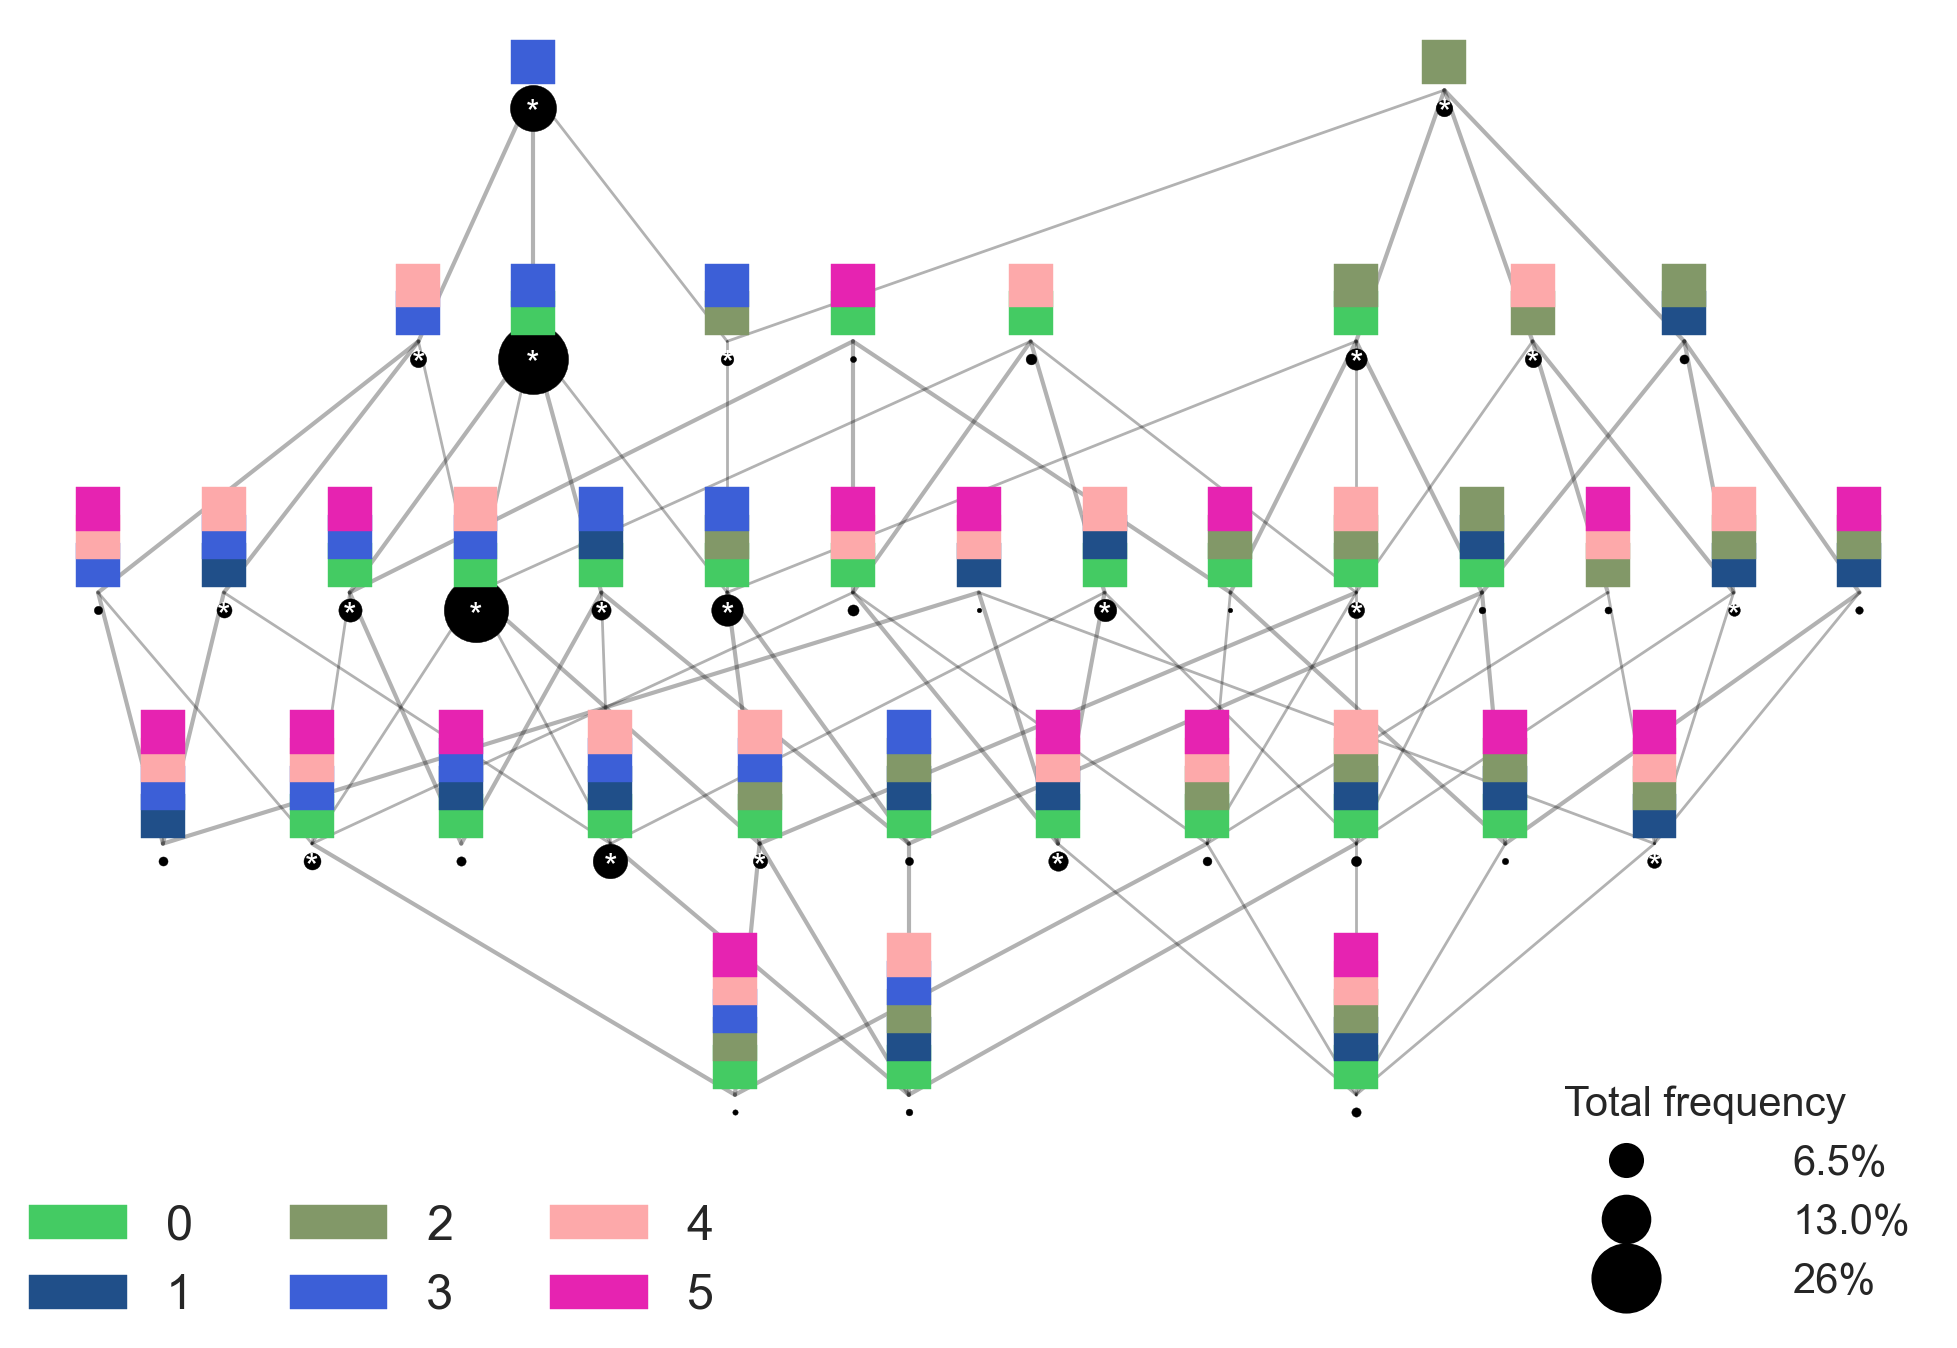

In [13]:
sp.pl.cn_map(cnmap_dict = cnmap_dict_imc, # dictionary from the previous step
        adata = adata, # adata object
        cn_col = "CN_k20_n6", # column with CNs used to color the plot
        palette = None, # color dictionary
        figsize=(25, 15), # figure size
        savefig=False, # save figure as pdf
        output_fname = "", # change it to file name you prefer when saving the figure
        output_dir= output_dir # specify output directory here (if savefig=True)
    )

## Barycentric coordinate plots

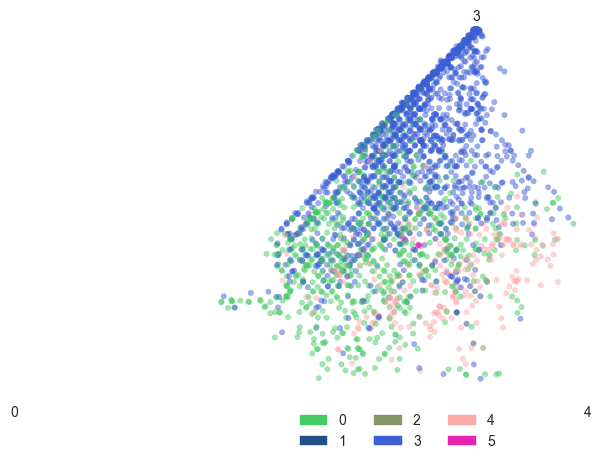

In [15]:
sp.pl.BC_projection(adata=adata,
    cnmap_dict = cnmap_dict_imc, # dictionary from the previous step
    cn_col = "CN_k20_n6", # column with CNs
    plot_list = [0, 3, 4], # list of CNs to plot (three for the corners)
    cn_col_annt = "CN_k20_n6", # column with CNs used to color the plot
    palette = None, # color dictionary
    figsize=(5, 5), # figure size
    rand_seed = 1, # random seed for reproducibility
    n_num = None, # number of neighbors
    threshold = 0.6) # threshold for percentage of cells in CN

## Patch proximity analysis

In [18]:
adata.obs['CN_k20_n6'] = adata.obs['CN_k20_n6'].astype(str)

Estimated number of clusters: 5
Estimated number of noise points: 50


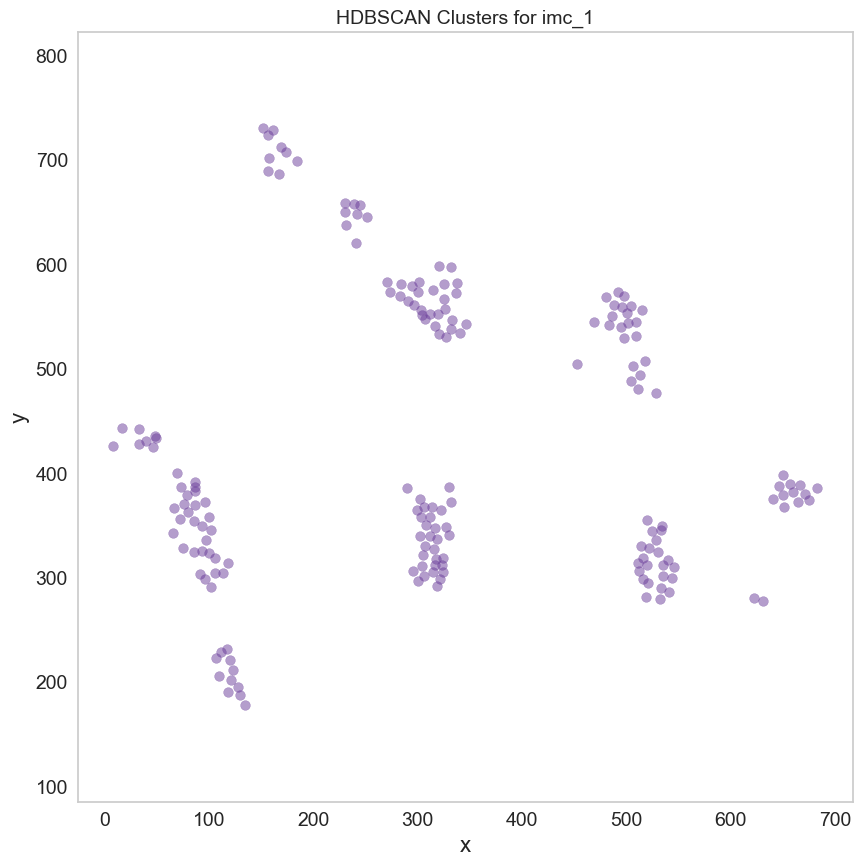

2025-04-14 23:31:53.847497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:31:53.847497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:31:53.847497: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Finished imc_1


In [21]:
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "condition", # column with the region information
    patch_column = "CN_k20_n6", # column with the patch information (derive patches from this column)
    group='1', # group to consider
    min_cluster_size=20, # minimum cluster size to consider
    x_column='x', y_column='y', # spatial coordinates
    radius = 20, # to get the distance in µm
    edge_neighbours = 2, # number of neighbours to consider for edge detection
    key_name = 'ppa_result_20', # key name to store the result in adata.uns
    plot = True) # plot detection for demonstration purposes

Estimated number of clusters: 5
Estimated number of noise points: 50


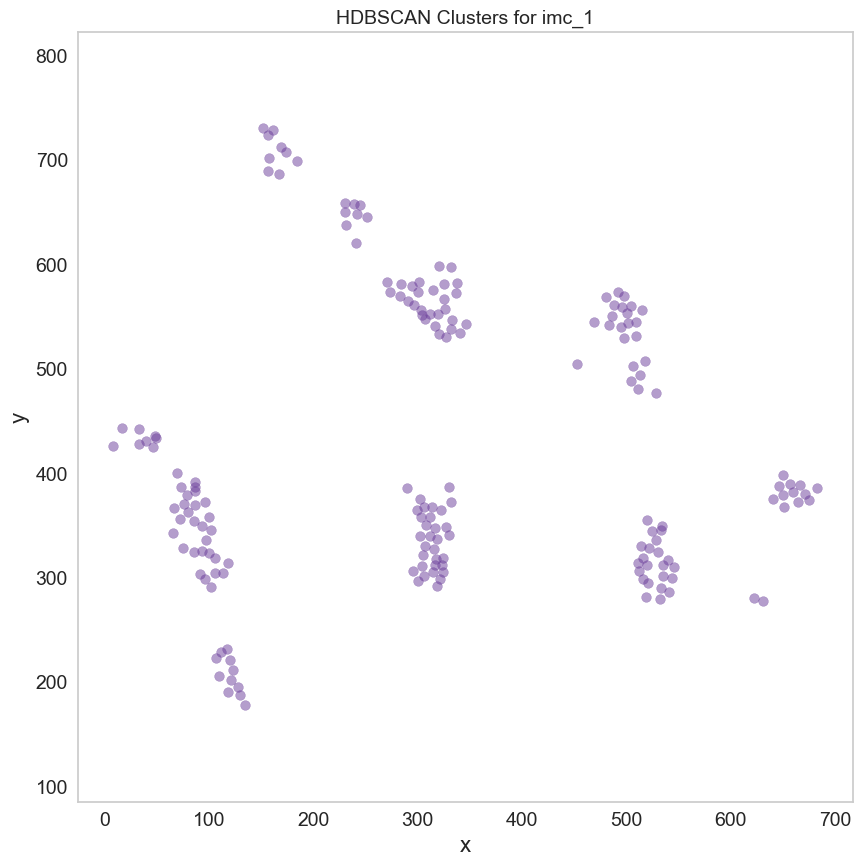

2025-04-14 23:36:02.817103: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:02.910209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:02.921974: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Finished imc_1
Estimated number of clusters: 5
Estimated number of noise points: 50


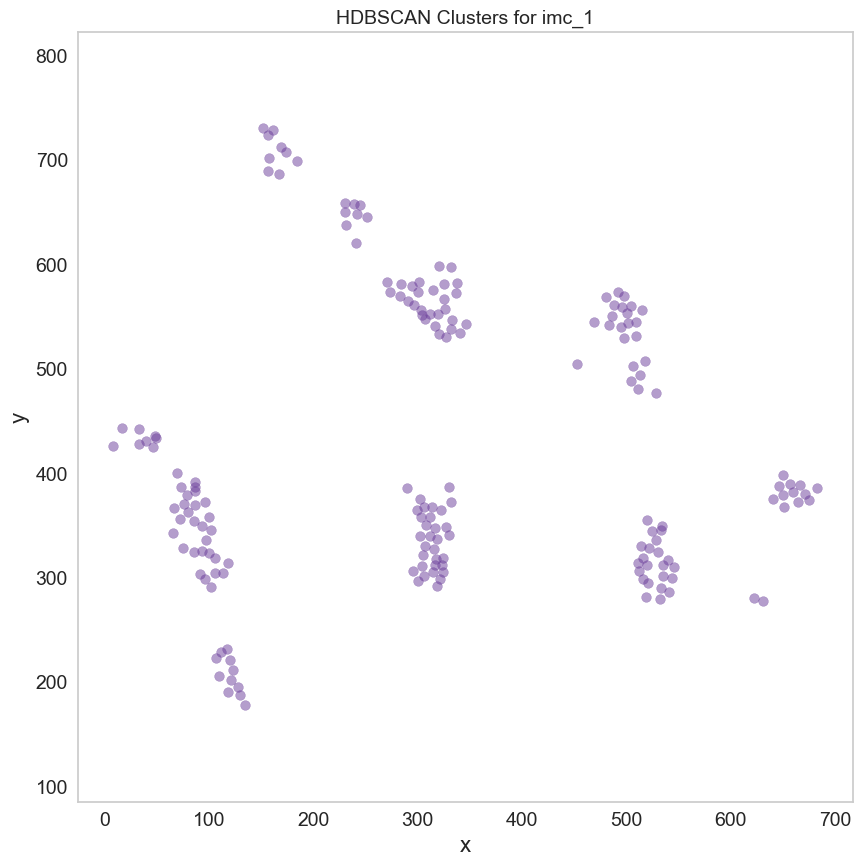

2025-04-14 23:36:15.055055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:15.057250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:15.057577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Finished imc_1
Estimated number of clusters: 5
Estimated number of noise points: 50


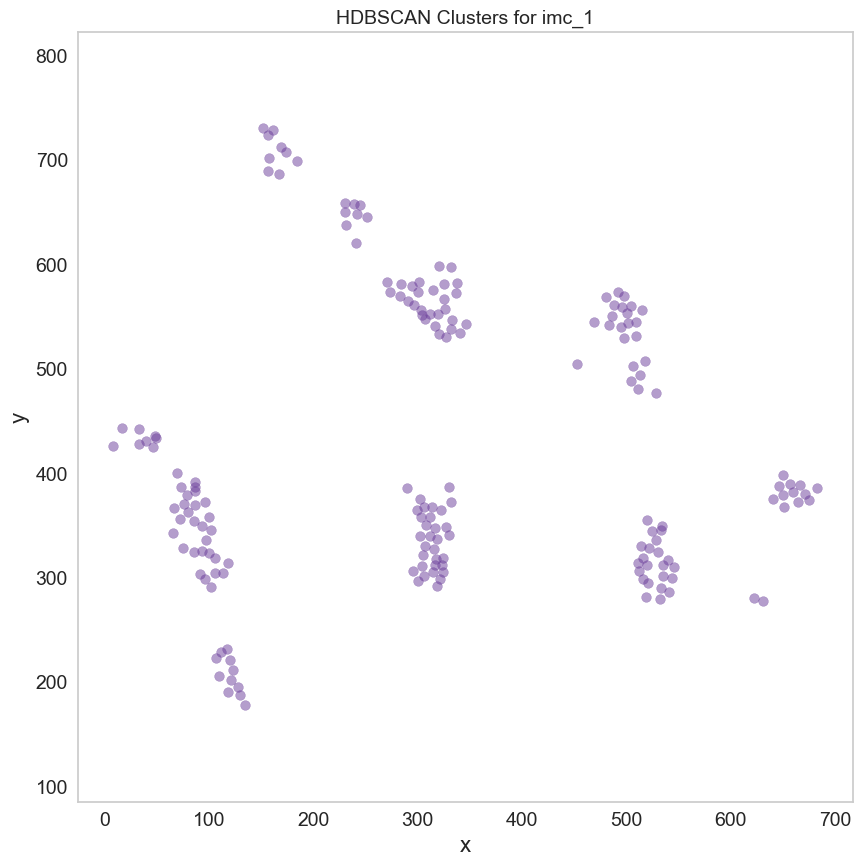

2025-04-14 23:36:26.746750: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:26.769843: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:26.799910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Finished imc_1
Estimated number of clusters: 5
Estimated number of noise points: 50


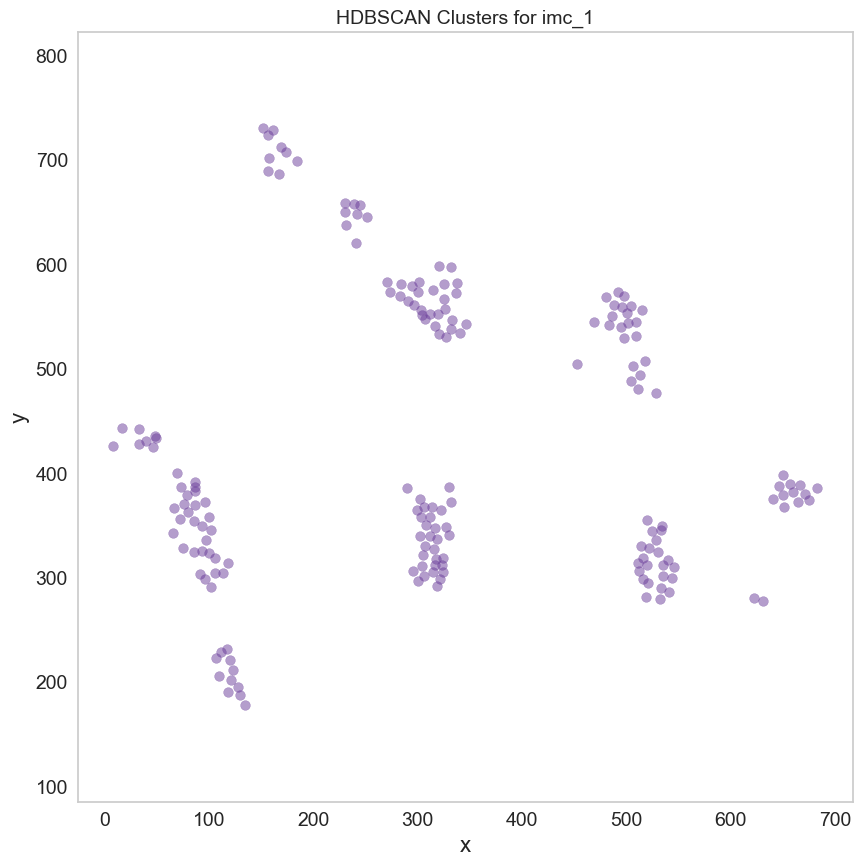

2025-04-14 23:36:38.547005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:38.633575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:38.633579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Finished imc_1
Estimated number of clusters: 5
Estimated number of noise points: 50


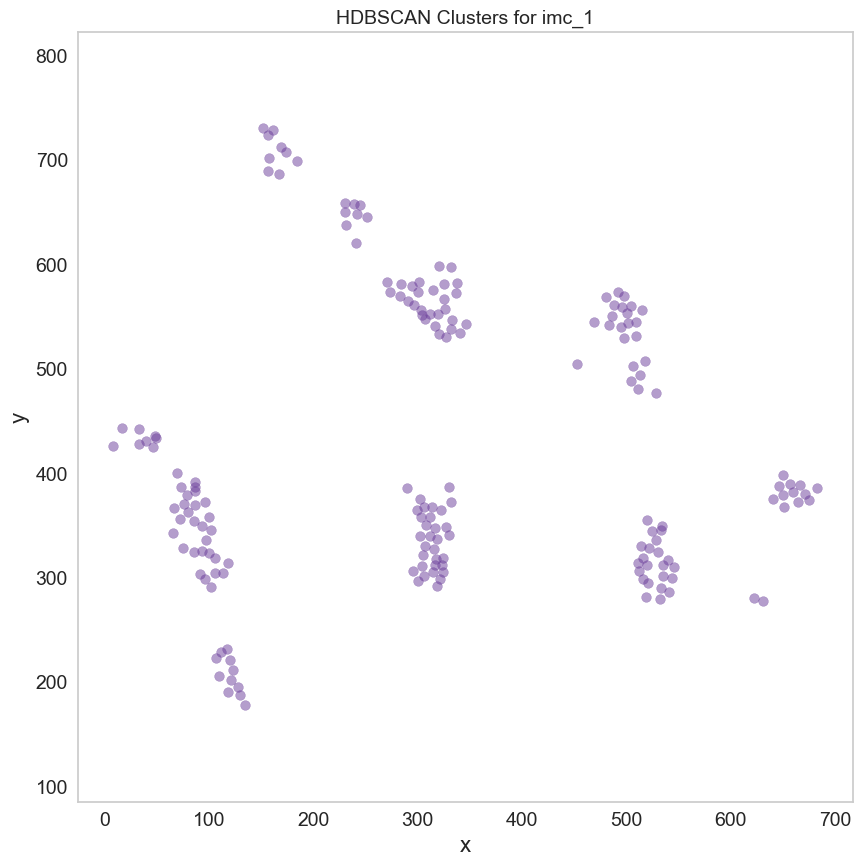

2025-04-14 23:36:50.280562: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:50.297218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-14 23:36:50.331628: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Figure(1500x500)
Finished imc_1


In [25]:
pixel_to_um = 0.1 # conversion factor from pixel to µm
distances = [5/pixel_to_um, 10/pixel_to_um, 15/pixel_to_um, 20/pixel_to_um, 25/pixel_to_um] # distances in µm
key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'] # key names to store the results

for distance, key_name in zip(distances, key_names): # loop over distances and key names
    # this region result is also saved to adata.uns
    region_results = sp.tl.patch_proximity_analysis(
        adata, 
        region_column = "condition", # column with the region information
        patch_column = "CN_k20_n6", # column with the patch information (derive patches from this column)
        group='1', # group to consider
        min_cluster_size=20, # minimum cluster size to consider
        x_column='x', y_column='y', # spatial coordinates
        radius = distance, # to get the distance in µm
        edge_neighbours = 2, # number of neighbours to consider for edge detection
        key_name = key_name, # key name to store the result in adata.uns
        plot = True) # plot detection for demonstration purposes

Key 0: ppa_result_25
Key 0 has 9230 rows.
Key 1: ppa_result_20
Key 1 has 6871 rows.
Key 2: ppa_result_15
Key 2 has 4697 rows.
Key 3: ppa_result_10
Key 3 has 2760 rows.
Key 4: ppa_result_5
Key 4 has 1123 rows.


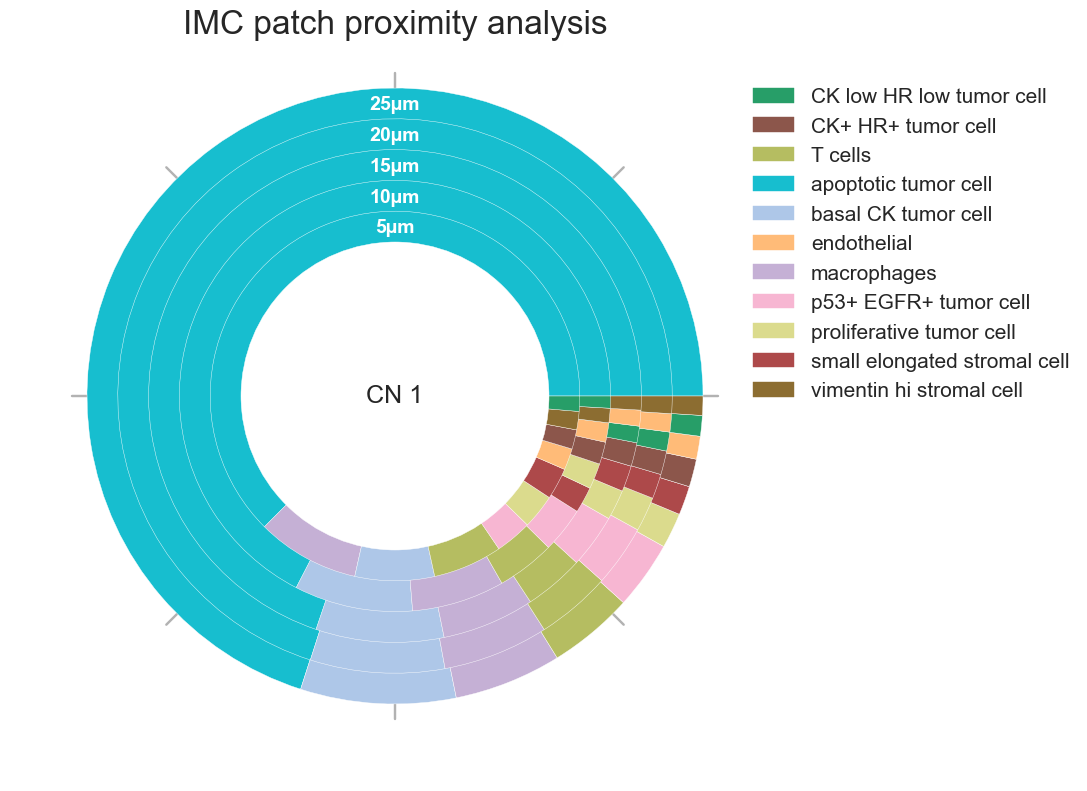

In [26]:
sp.pl.ppa_res_donut(adata, 
                palette=None, # color palette
                cat_col = "cell type", # column with the cell type or CN information
                key_names = ['ppa_result_5', 'ppa_result_10', 'ppa_result_15', 'ppa_result_20', 'ppa_result_25'], # key names to plot
                radii = [5, 10, 15, 20, 25], # radii in µm
                unit = 'µm', # unit
                figsize = (10,10), # figure size
                add_guides = True, # add guides
                text = 'CN 1', # text to display in the middle
                label_color='white', # distance label color
                subset_column = 'condition', # column to subset
                subset_condition = 'imc', # condition to subset
                title='IMC patch proximity analysis') # title